# Figure 4

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
colors = ["#66c2a5", "#fc8d62", "#8da0cb"]

In [14]:
df

,Dataset,Atlas,Type,Value
0,SWU4,DKT,Ipsi,0.8718599412223755
1,SWU4,DKT,Ipsi,0.8620211814345433
2,SWU4,DKT,Ipsi,0.8263799352325578
3,SWU4,DKT,Ipsi,0.8645002809107104
4,SWU4,DKT,Ipsi,0.8688796461693615
...,...,...,...,...
3976,MRN_1,DKT,Contra,0.22566243127496882
3977,MRN_1,DKT,Contra,0.17111749095645298
3978,MRN_1,DKT,Contra,0.12200346964985631
3979,MRN_1,DKT,Contra,0.19556070772899747


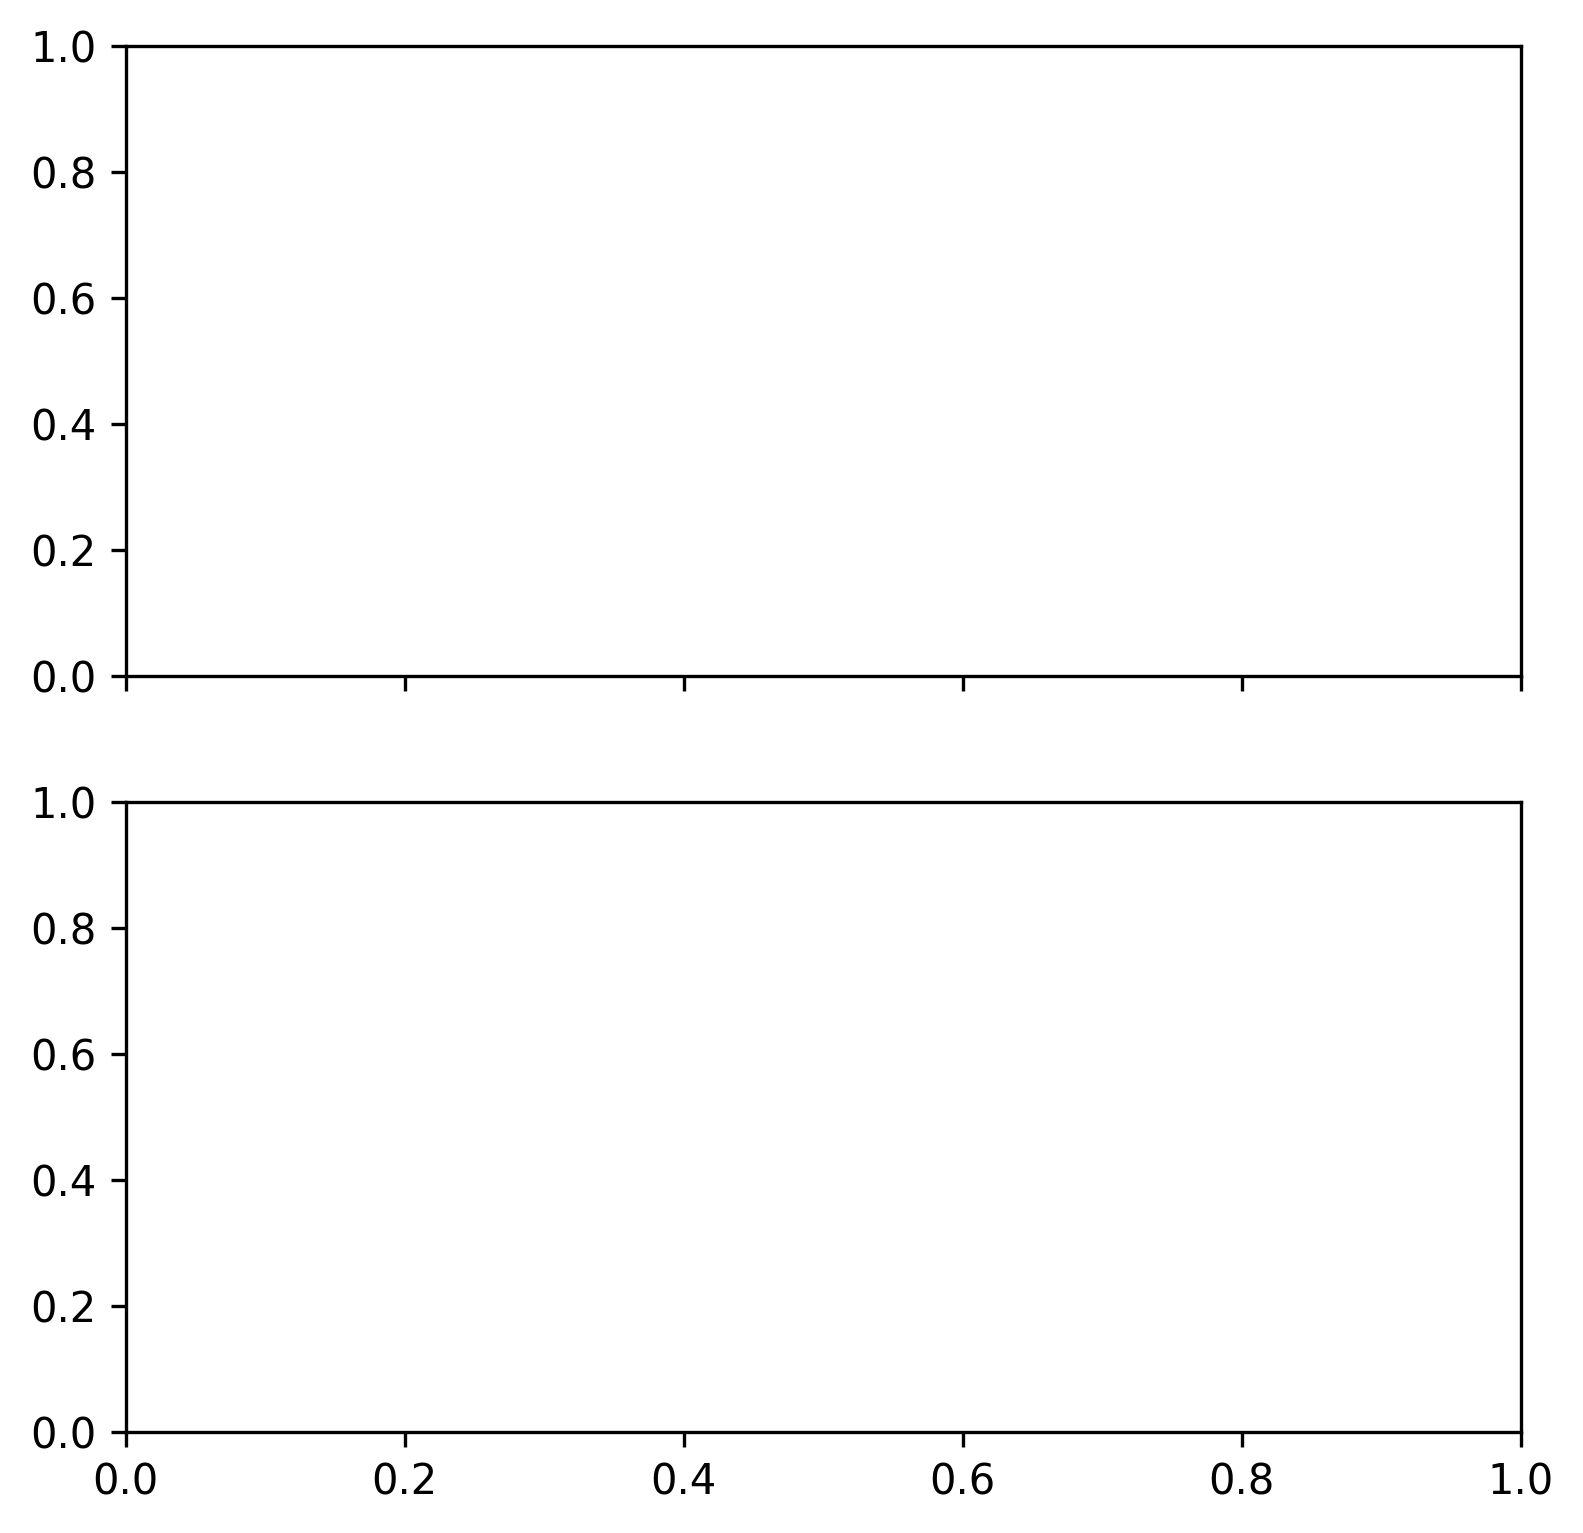

In [13]:
fig, ax = plt.subplots(nrows=2, dpi=300, figsize=(6, 6), sharex=True)

parc = "dkt"

df = pd.read_csv(f"../../ipsi_files/dwi_ipsi_{parc}.csv", delimiter=" ")
df = df[df.Dataset != "Dataset"]

In [10]:
df[df.Dataset == "Dataset"]

,Dataset,Atlas,Type,Value
1266,Dataset,Atlas,Type,Value
2167,Dataset,Atlas,Type,Value
2555,Dataset,Atlas,Type,Value
2907,Dataset,Atlas,Type,Value
3250,Dataset,Atlas,Type,Value
3392,Dataset,Atlas,Type,Value
3471,Dataset,Atlas,Type,Value
3592,Dataset,Atlas,Type,Value
3707,Dataset,Atlas,Type,Value
3765,Dataset,Atlas,Type,Value


/Users/j1c/miniconda3/envs/m2g/lib/python3.8/site-packages/seaborn/axisgrid.py:854: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  func(*plot_args, **plot_kwargs)


TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

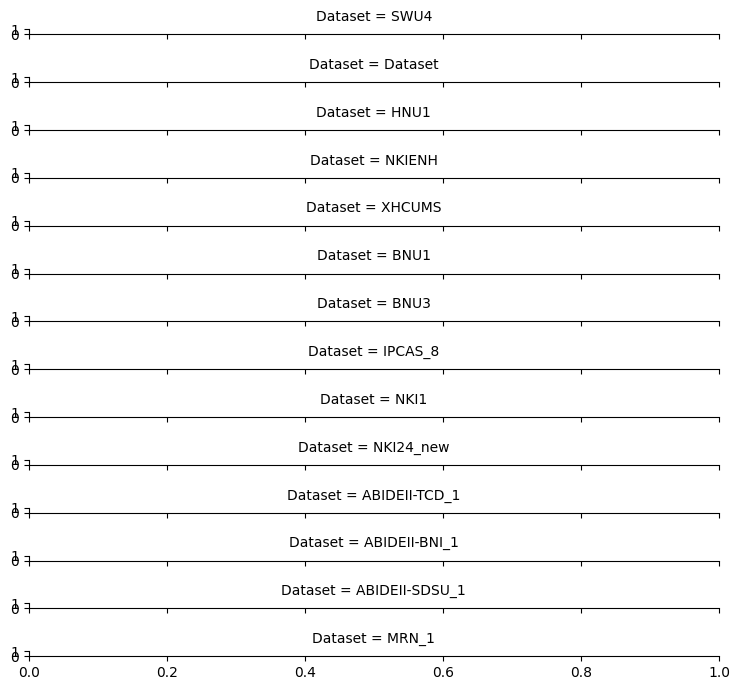

In [5]:
# z = pd.read_csv("../../ipsi_files/ipsi_aal.csv", delimiter=" ")

# Use FacetGrid to create the facet with one column
ridge_plot = sns.FacetGrid(
    z, row="Dataset", hue="Type", aspect=15, height=0.5
)  # aspect=5, height=1.25)
# Use map function to make density plot in each element of the grid.
ridge_plot.map(sns.kdeplot, "Value", clip_on=False, fill=True, alpha=0.7, lw=4, bw=0.2)
ridge_plot.map(plt.axhline, y=0, lw=4, clip_on=False)
ridge_plot.savefig("Ridgeline_plot_Seaborn_first_step.png")

x = 1
if x == 3:
    # pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
    g = sns.FacetGrid(
        z, row="Dataset", hue="Type", aspect=15, height=0.5
    )  # , palette=pal)

    # Draw the densities in a few steps
    g.map(
        sns.kdeplot,
        "Value",
        bw_adjust=0.5,
        clip_on=False,
        fill=True,
        alpha=1,
        linewidth=1.5,
    )
    g.map(sns.kdeplot, "Value", clip_on=False, color="w", lw=2, bw_adjust=0.5)
    g.map(plt.axhline, y=0, lw=2, clip_on=False)

    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(
            0,
            0.2,
            label,
            fontweight="bold",
            color=color,
            ha="left",
            va="center",
            transform=ax.transAxes,
        )

    g.map(label, "Dataset")

    # Set the subplots to overlap
    g.fig.subplots_adjust(hspace=-0.25)

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[])
    # g.set(xlim=(20,65))
    g.despine(bottom=True, left=True)
    # plt.savefig("Ridgeline_plot_Seaborn_first_step.png", dpi=300)